In [14]:
import gymnasium as gym
import matplotlib.pyplot as plt
import minihack
from minihack import RewardManager

from utils import *
from AA_algorithms import *
import IPython.display as display



Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                              --------------------                              
                              |.@..............$.|                              
                              |$...............$.|                              
                              |...............$..|                              
                           

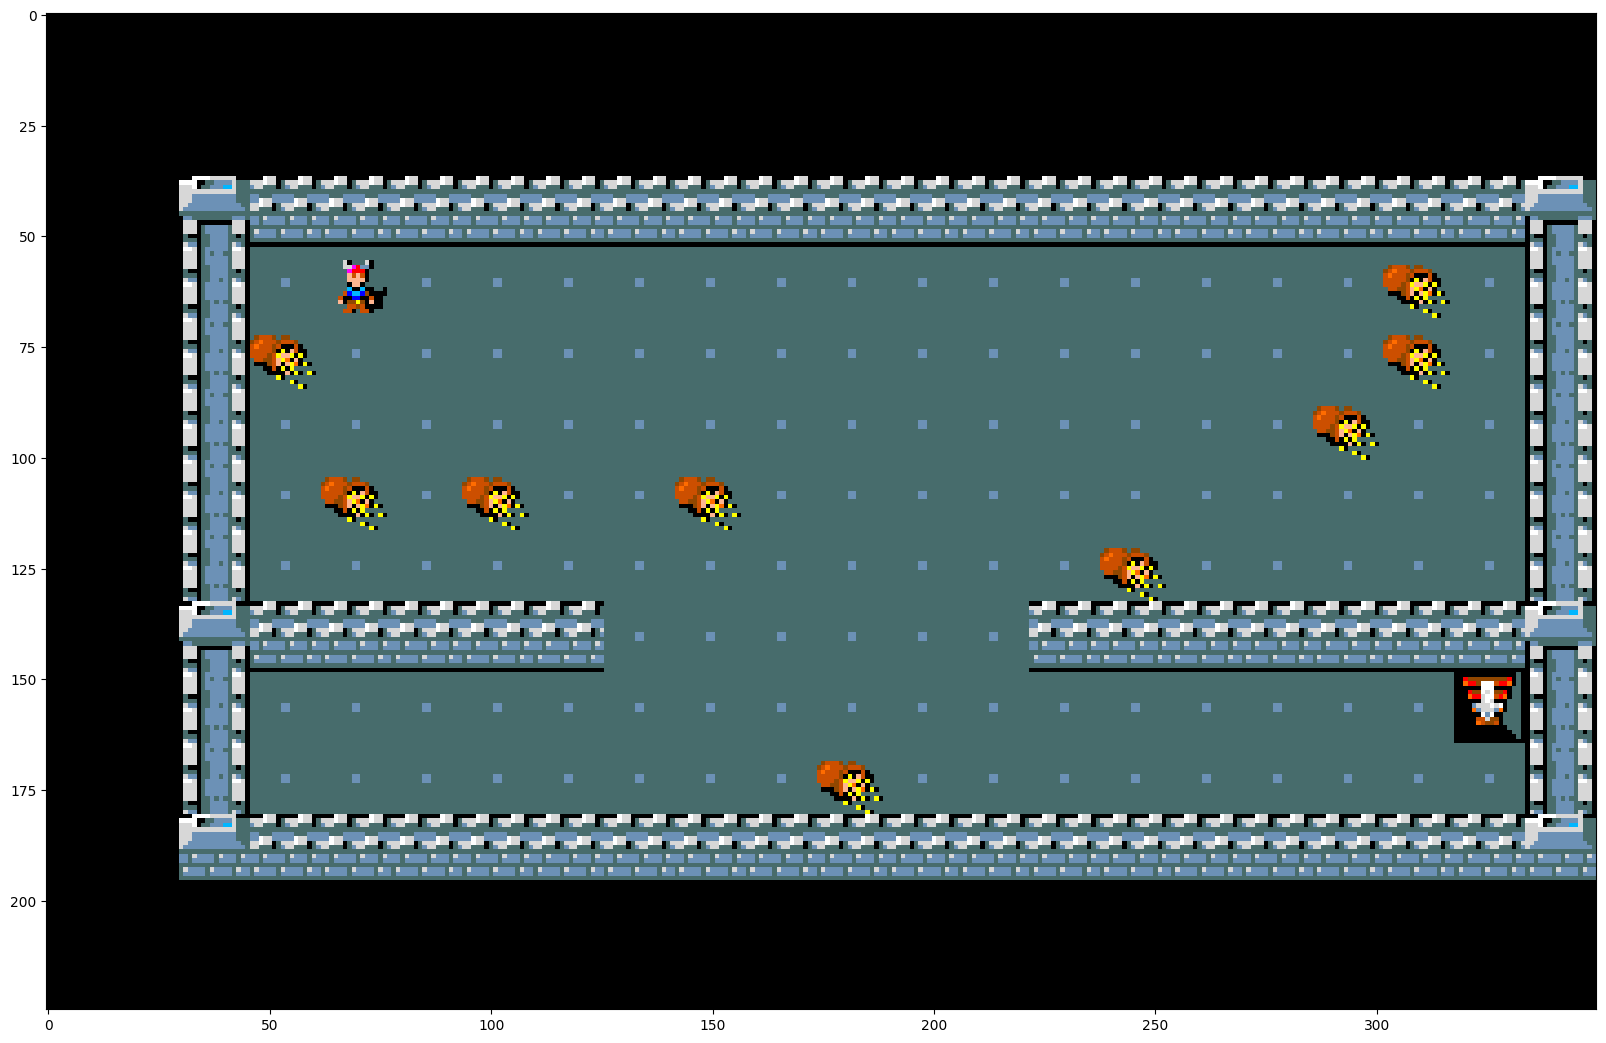

In [15]:

reward = RewardManager()
env1 = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("glyphs", "chars", "colors", "pixel"),
    des_file="map1.des",
    reward_manager=reward,
)
state1, _ = env1.reset()
env1.render()
# plot the map in a bigger size
plt.figure(figsize=(20, 20))
plt.imshow(state1['pixel'][75:300, 450:800])



Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                            ----------------------                              
                            |..}...$...}....$.}...|                             
                           

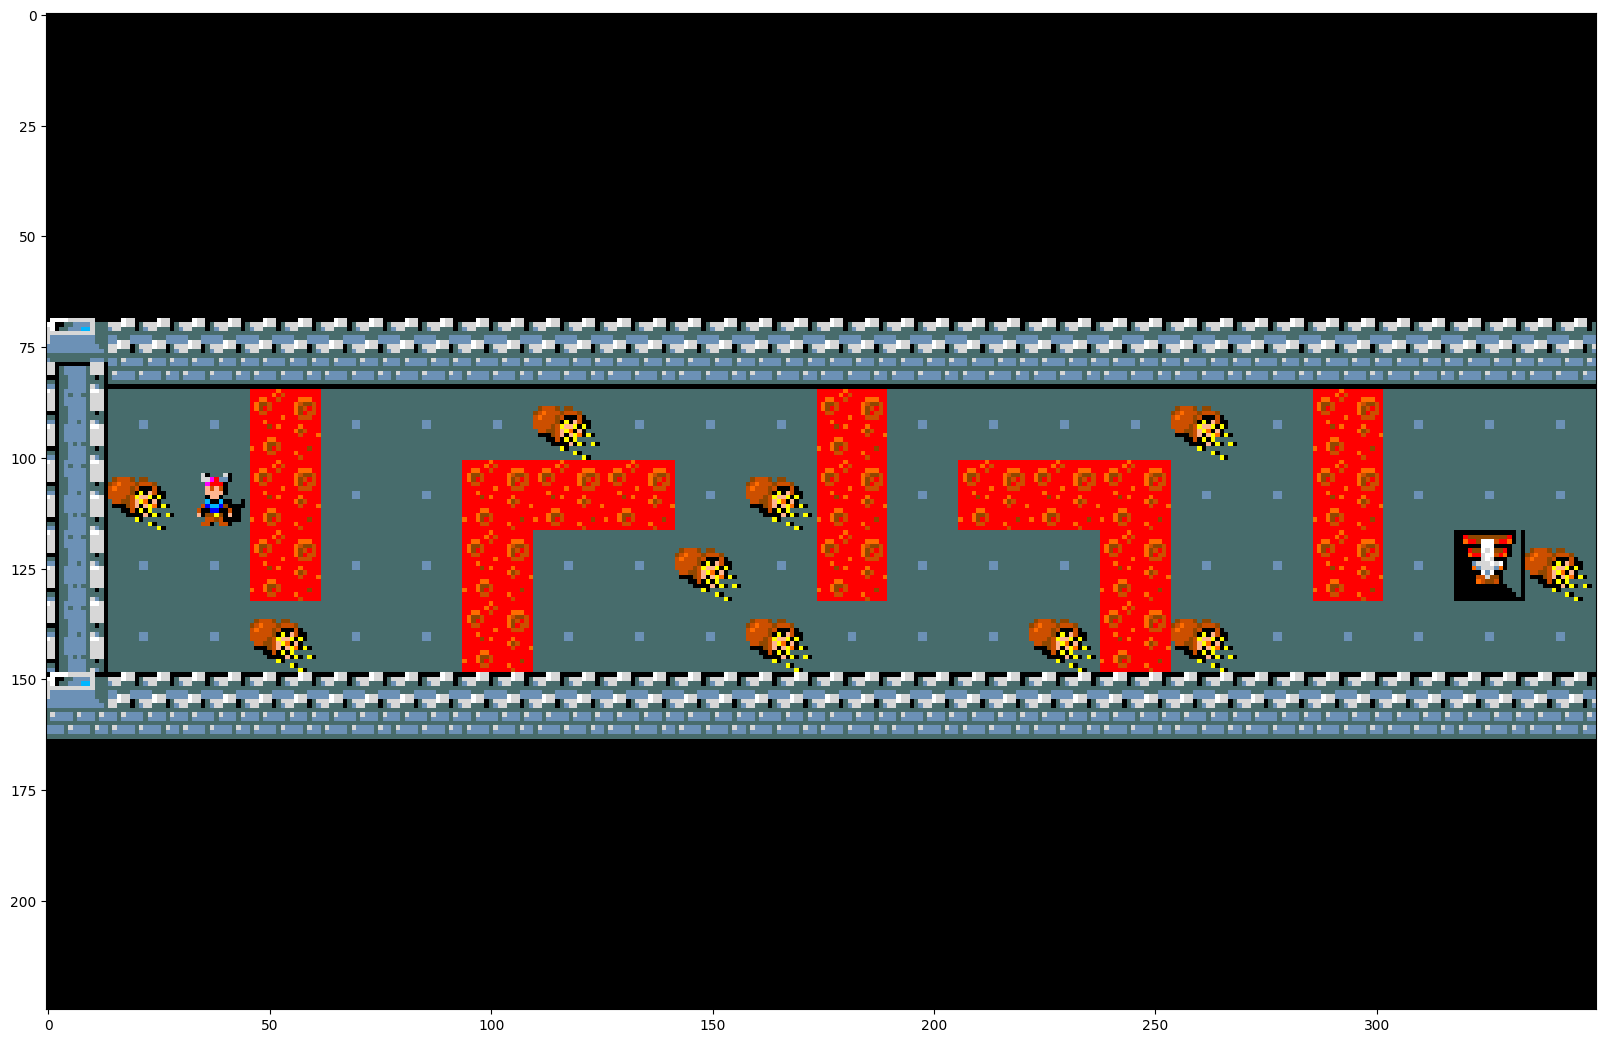

In [16]:
env2 = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("glyphs", "chars", "colors", "pixel"),
    des_file="map2_static.des",
)
state2, _ = env2.reset()
env2.render()
# plot the map in a bigger size
plt.figure(figsize=(20, 20))
plt.imshow(state2['pixel'][75:300, 450:800])


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                              --------------------                              
                              |.$.^.........$.^..|                              
                           

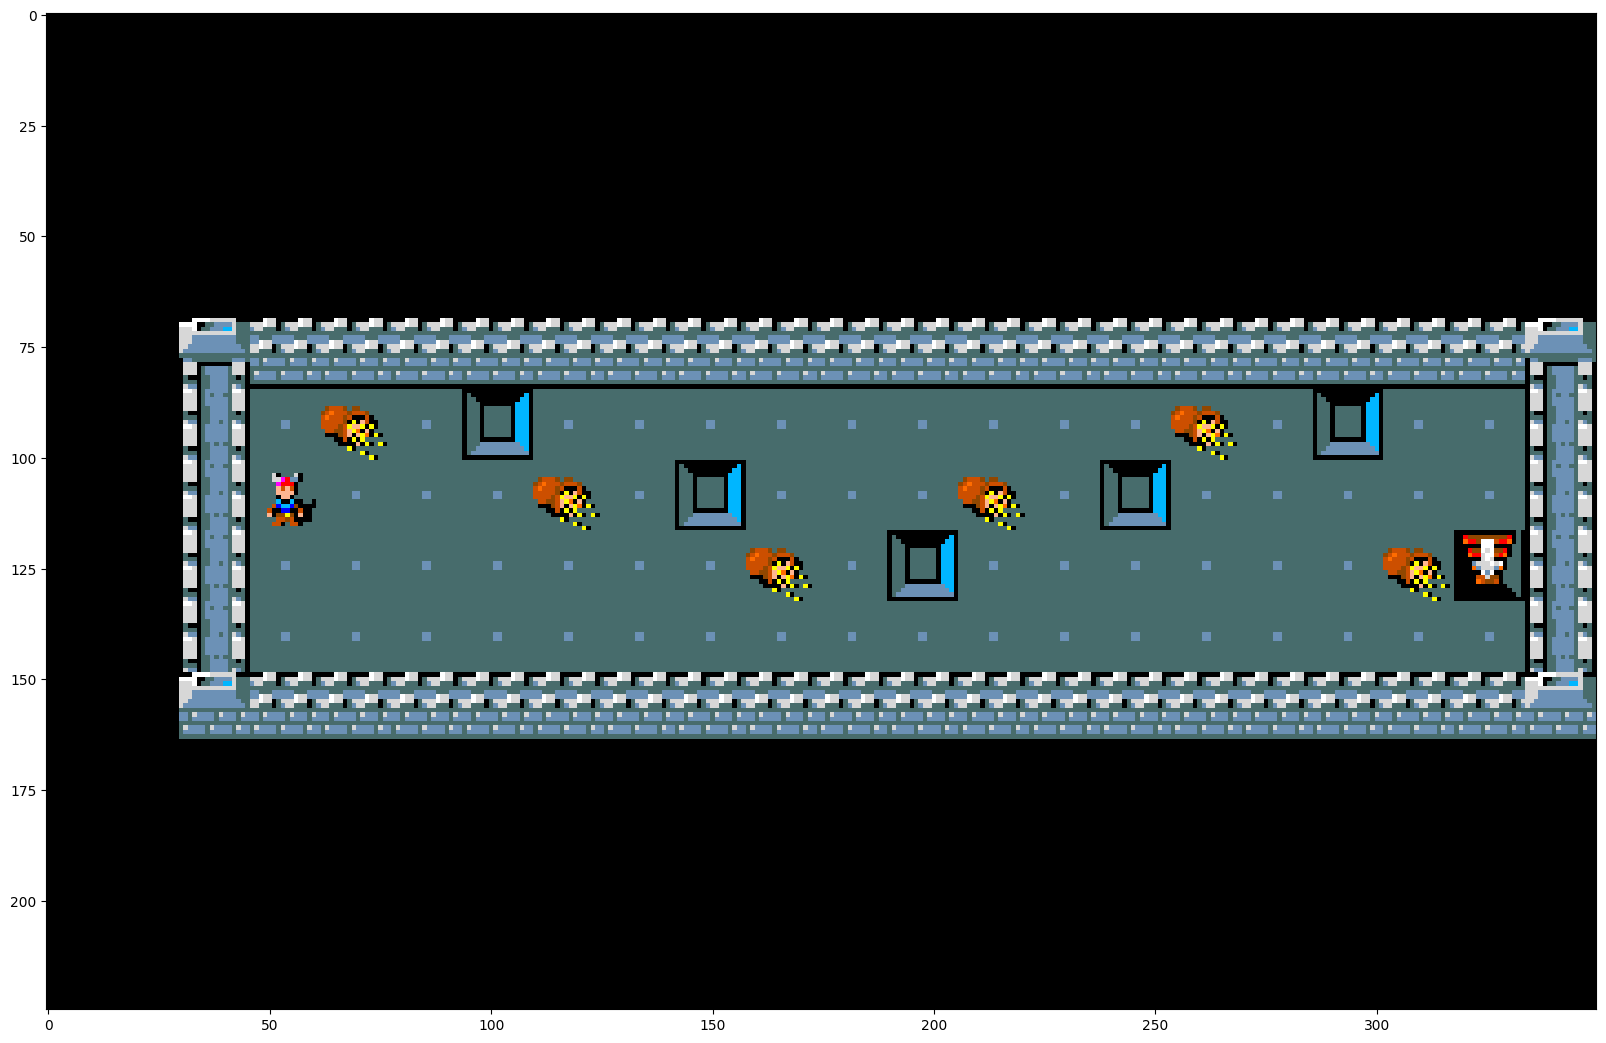

In [17]:
env3 = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("glyphs", "chars", "colors", "pixel"),
    des_file="map3.des",
    reward_manager=reward,
)
state3, _ = env3.reset()
env3.render()
# plot the map in a bigger size
plt.figure(figsize=(20, 20))
plt.imshow(state3['pixel'][75:300, 450:800])

# Testing A* algorithm on a custom map

In [18]:
directions = ["UP", "RIGHT", "DOWN", "LEFT"]

env = env2
state, _ = env2.reset()
game_map = state['chars']
game = state['pixel']
start = get_player_location(game_map)
target = get_target_location(game_map)

char_map = np.vectorize(chr)(game_map)
gold_positions = np.where(char_map == '$')
# zip into a list of int tuples (x, y)
gold_positions = list(zip(gold_positions[0], gold_positions[1]))
print("Gold positions:", gold_positions)

Gold positions: [(np.int64(10), np.int64(35)), (np.int64(10), np.int64(44)), (np.int64(11), np.int64(29)), (np.int64(11), np.int64(38)), (np.int64(12), np.int64(37)), (np.int64(12), np.int64(49)), (np.int64(13), np.int64(31)), (np.int64(13), np.int64(38)), (np.int64(13), np.int64(42)), (np.int64(13), np.int64(44))]



Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                            ----------------------                              
                            |.@}...$...}....$.}...|                             
                           

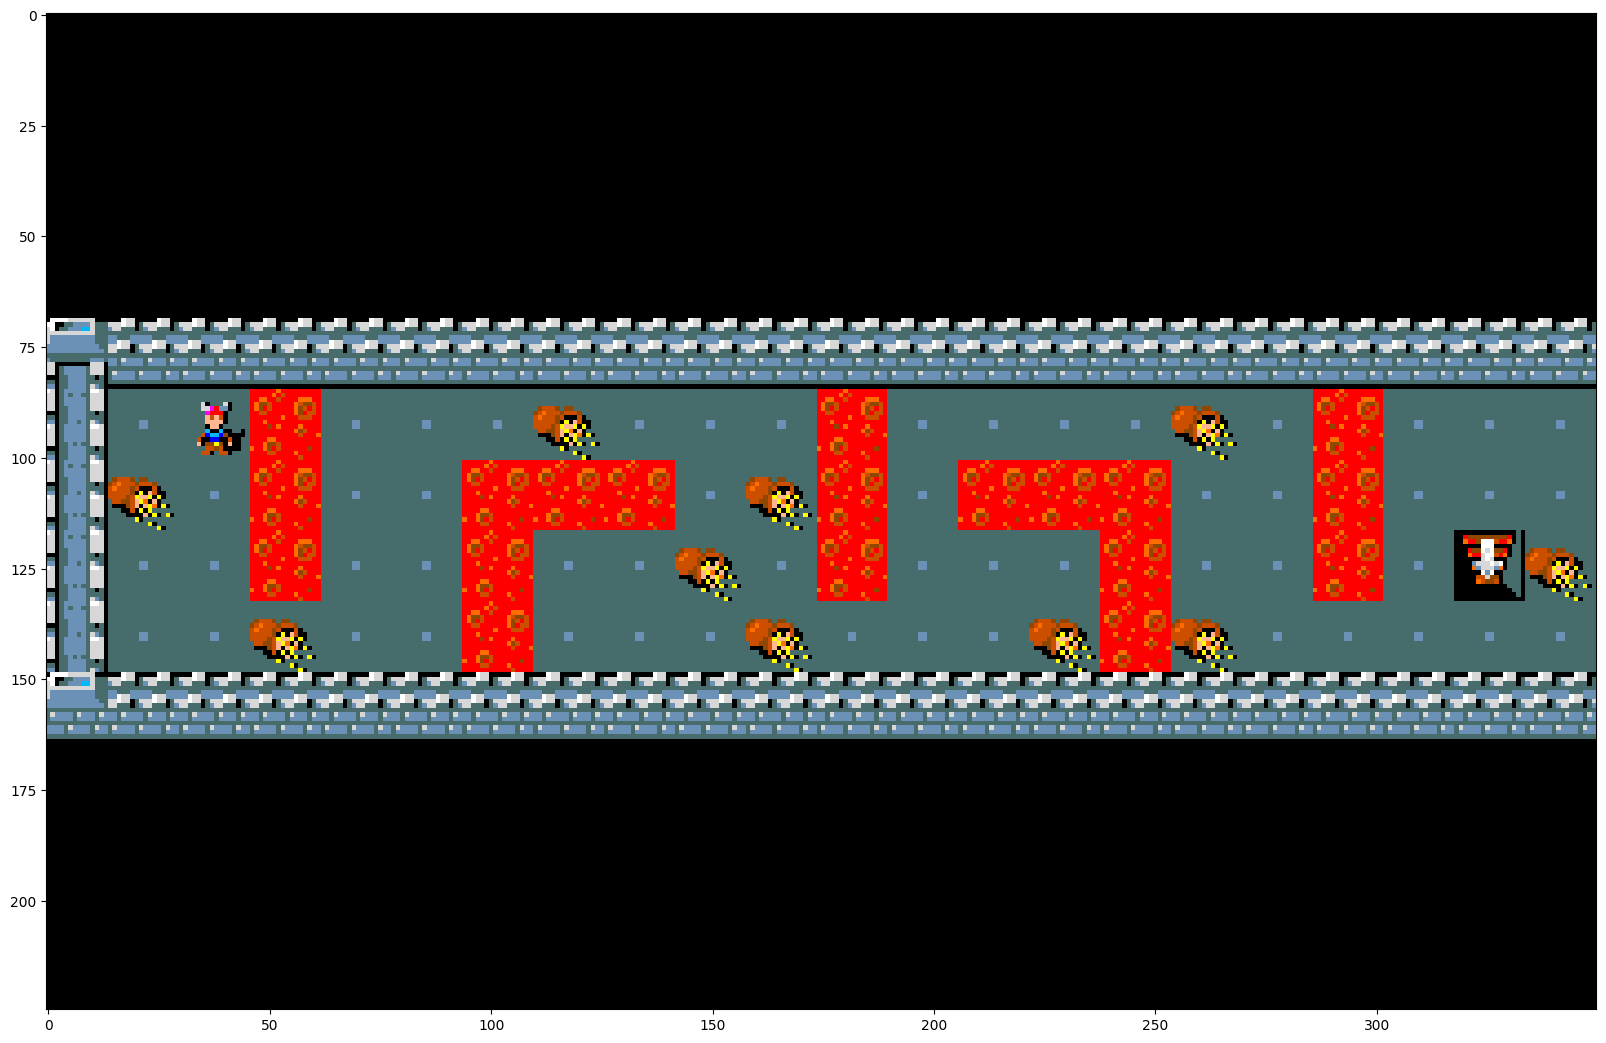

In [19]:
# print the current map
plt.figure(figsize=(20, 20))
plt.imshow(state['pixel'][75:300, 450:800])
env.render()


In [22]:
path = a_star_gold(game_map, start, target, manhattan_distance, gold_bonus=4)
actions_1 = actions_from_path(start, path[1:])
print("Actions to take:", list((map(lambda x: directions[x], actions_1))))
# check how much gold is collected in the path
gold_collected = 0
for (x, y) in path:
    if chr(game_map[x, y]) == '$':
        gold_collected += 1

print("Gold collected in the path:", gold_collected)

Actions to take: ['DOWN', 'DOWN', 'DOWN', 'RIGHT', 'RIGHT', 'UP', 'RIGHT', 'UP', 'UP', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'DOWN', 'RIGHT', 'DOWN', 'LEFT', 'DOWN', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'UP', 'LEFT', 'LEFT', 'UP', 'UP', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'DOWN', 'DOWN', 'LEFT', 'DOWN', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'UP']
Gold collected in the path: 8


In [24]:
path = a_star_gold(game_map, start, target, manhattan_distance)
actions_2 = actions_from_path(start, path[1:])
print("Actions to take:", list((map(lambda x: directions[x], actions_2))))
# check how much gold is collected in the path
gold_collected = 0
for (x, y) in path:
    if chr(game_map[x, y]) == '$':
        gold_collected += 1

print("Gold collected in the path:", gold_collected)

Actions to take: ['DOWN', 'DOWN', 'DOWN', 'RIGHT', 'RIGHT', 'UP', 'RIGHT', 'UP', 'UP', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'DOWN', 'RIGHT', 'DOWN', 'DOWN', 'RIGHT', 'RIGHT', 'UP', 'UP', 'UP', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'DOWN', 'DOWN', 'DOWN', 'RIGHT', 'RIGHT', 'RIGHT', 'UP']
Gold collected in the path: 5


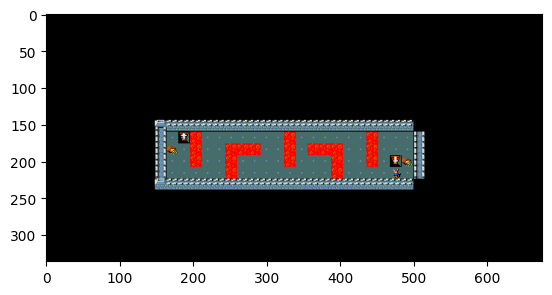

In [26]:
import time
env.reset()
image = plt.imshow(game[:, 300:975])
for action in actions_1:
    print("Action taken:", directions[action])
    s, _, done, _, dic = env.step(action)
    if not done:
        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(0.5)
        image.set_data(s['pixel'][:, 300:975])
    else:
        print(f"Episode finished:", dic)
        break
